In [24]:
import pandas as pd

In [40]:
df = pd.read_csv('csv_files/Medical_insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [27]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [28]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.drop_duplicates(inplace=True)

In [30]:
df.dtypes  

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [31]:
numerical   = df.select_dtypes(exclude=['object','bool']).columns.to_list()
categorical = df.select_dtypes(exclude=['int64','float64']).columns.to_list()

print('Numerical columns :', numerical)
print('categorical columns :', categorical)

Numerical columns : ['age', 'bmi', 'children', 'charges']
categorical columns : ['sex', 'smoker', 'region']


In [ ]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['sex'].unique()

array([1, 0])

In [45]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['smoker'].unique()

array([1, 0])

In [61]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [47]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523


/tmp/ipykernel_337963/3881762710.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='charges', estimator='mean', ci=None)
/tmp/ipykernel_337963/3881762710.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
/tmp/ipykernel_337963/3881762710.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='pastel')


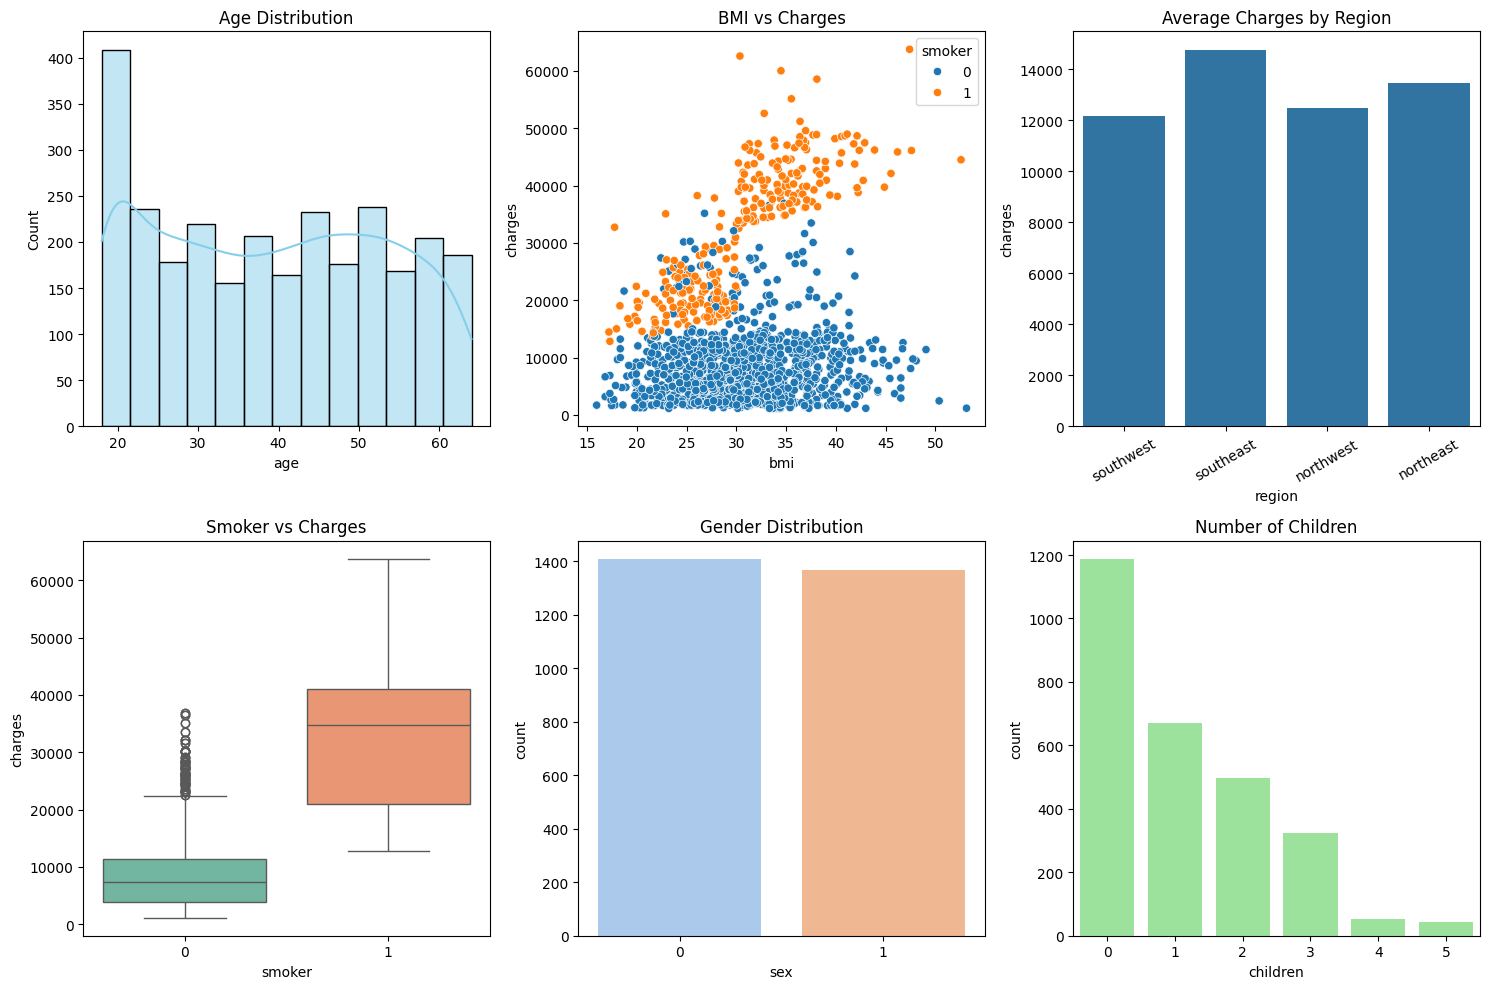

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up figure
plt.figure(figsize=(15, 10))

# Plot 1: Age distribution (Histogram)
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# Plot 2: BMI vs Charges (Scatter)
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')

# Plot 3: Average Charges by Region (Bar)
plt.subplot(2, 3, 3)
sns.barplot(data=df, x='region', y='charges', estimator='mean', ci=None)
plt.title('Average Charges by Region')
plt.xticks(rotation=30)

# Plot 4: Smoker vs Charges (Boxplot)
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title('Smoker vs Charges')

# Plot 5: Sex Distribution (Countplot)
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='sex', palette='pastel')
plt.title('Gender Distribution')

# Plot 6: Children Count (Bar)
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='children', color='lightgreen')
plt.title('Number of Children')

plt.tight_layout()
plt.show()


In [50]:
x = df.drop('charges', axis=1)
y = df['charges'] 

In [51]:
categorical_cols = x.select_dtypes(include=['object','bool']).columns
numerical_cols = x.select_dtypes(include=['int64','float64']).columns
print('Categorical columns :', categorical_cols)
print('Numerical columns :', numerical_cols)

Categorical columns : Index(['region'], dtype='object')
Numerical columns : Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


In [52]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical', StandardScaler(), numerical_cols),
                    ('categorical', OneHotEncoder(), categorical_cols),
                ]
)

Train Test Split

In [53]:
x_fitted = preprocessor.fit_transform(x)
x_fitted.shape

(2772, 9)

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_fitted,y,test_size=0.2,random_state=43)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2217, 9) (2217,)
(555, 9) (555,)


In [58]:
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


def evaluate(test,pred):
    r2 = r2_score(test,pred)
    mae = mean_absolute_error(test,pred)
    rmse = np.sqrt(mean_squared_error(test,pred))
    return r2,mae,rmse


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
results = []
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2,mae,rmse = evaluate(y_test,y_pred)
    results.append({'model_name':model_name,
                    'r2' : r2,
                    'mae':mae,
                    'rmse':rmse})

    print(model_name)
    print(f'r2 score : {r2}, MAE : {mae}, RMSE : {rmse}')


Linear Regression
r2 score : 0.7554190652719499, MAE : 4300.847882598912, RMSE : 6415.14553403088
Lasso
r2 score : 0.7553771805850712, MAE : 4301.160929235633, RMSE : 6415.694809998853
Ridge
r2 score : 0.7553962183354315, MAE : 4301.689268793773, RMSE : 6415.445154686735
K-Neighbors Regressor
r2 score : 0.8514117203706518, MAE : 2685.8569326385586, RMSE : 5000.201317808993
Decision Tree
r2 score : 0.9449461672345504, MAE : 675.145766018018, RMSE : 3043.609932188897
Random Forest Regressor
r2 score : 0.9468263176990089, MAE : 1356.3730363535128, RMSE : 2991.1871141392935
XGBRegressor
r2 score : 0.9552832827427274, MAE : 1123.1817047908926, RMSE : 2743.0275519153192
CatBoosting Regressor
r2 score : 0.9100678486266395, MAE : 1980.8289089455748, RMSE : 3890.0277946835245
AdaBoost Regressor
r2 score : 0.8379972639063926, MAE : 4010.580248509819, RMSE : 5221.032393376525


In [59]:
pd.DataFrame(results)

,model_name,r2,mae,rmse
0,Linear Regression,0.755419,4300.847883,6415.145534
1,Lasso,0.755377,4301.160929,6415.694810
2,Ridge,0.755396,4301.689269,6415.445155
3,K-Neighbors Regressor,0.851412,2685.856933,5000.201318
4,Decision Tree,0.944946,675.145766,3043.609932
5,Random Forest Regressor,0.946826,1356.373036,2991.187114
6,XGBRegressor,0.955283,1123.181705,2743.027552
7,CatBoosting Regressor,0.910068,1980.828909,3890.027795
8,AdaBoost Regressor,0.837997,4010.580249,5221.032393


XGBRegressor was the best

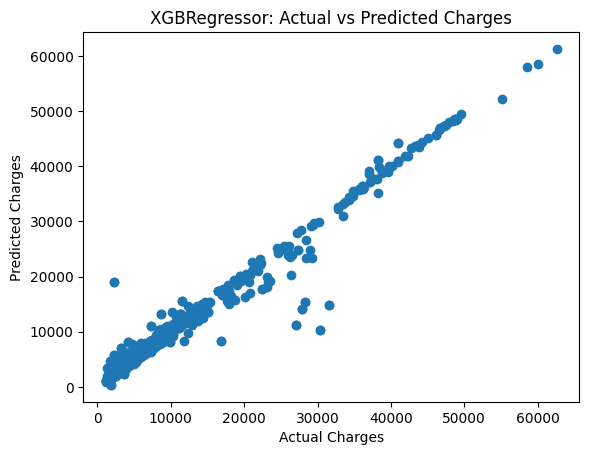

In [63]:
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)
xg_y_pred = xg_model.predict(x_test)
plt.scatter(y_test, xg_y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("XGBRegressor: Actual vs Predicted Charges")
plt.show()

In [64]:
import pickle
with open('xg_model.pkl','wb') as f:
    pickle.dump(xg_model,f)                       
with open('preprocessor.pkl','wb') as f:
    pickle.dump(preprocessor,f)

In [66]:
with open('xg_model.pkl','rb') as f:
    model = pickle.load(f)
with open('preprocessor.pkl','rb') as f:
    preprocessor = pickle.load(f)
sample = pd.DataFrame({
    'age':[40],
    'sex':[1],          
    'bmi':[25.5],
    'children':[2],
    'smoker':[0],
    'region':['northwest']
})
sample_fitted = preprocessor.transform(sample)
model.predict(sample_fitted)

array([7400.307], dtype=float32)